In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno



%matplotlib inline
#plt.rcParams["figure.figsize"] = [8, 8]

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_all = pd.read_csv('data.csv')


In [4]:
data_all.shape

(569, 33)

In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id - не несет никакой информации(удаляем)

Unnamed: 32 -- пустой столбец(удаляем)

diagnosis --- целевая

In [6]:
data_all.drop(['id', 'Unnamed: 32'], axis='columns', inplace=True)
data_all['diagnosis']=data_all['diagnosis'].apply(lambda x: 1 if x=='B' else 0)

In [7]:
data_all

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Получается 30 признаков, без пропусков

In [8]:
data_all.drop(['diagnosis'], axis='columns').describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
malignant = data_all[data_all.diagnosis == 0] 
benign = data_all[data_all.diagnosis == 1]
target=data_all['diagnosis']
data=data_all.drop(['diagnosis'], axis='columns')



Посмотрим пересечения значений для доброкачественных и злокачественных. Возможно будет понимание что какой то один признак решает

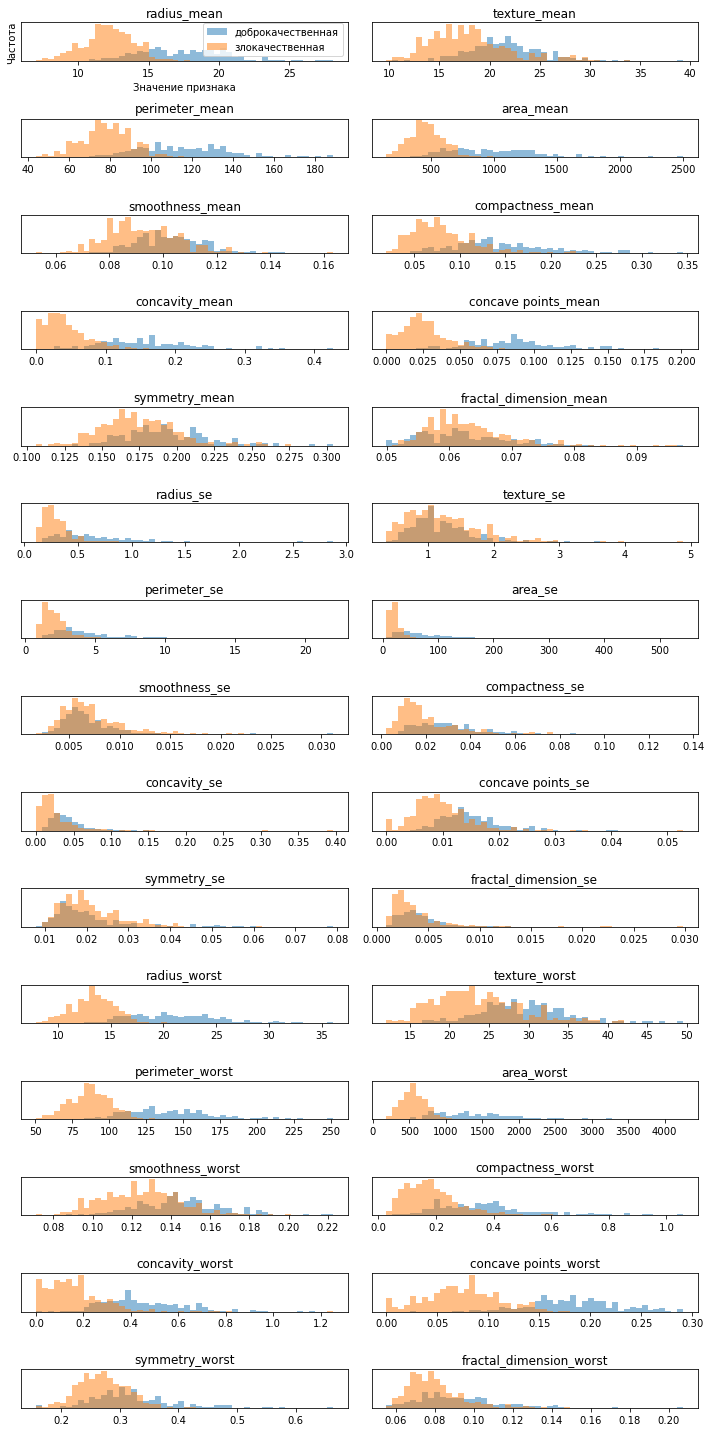

In [10]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20)) 
ax = axes.ravel() 
for i in range(30):
    _, bins = np.histogram(data_all.drop(['diagnosis'], axis='columns').iloc[:, i].values, bins=50) 
    ax[i].hist(malignant.drop(['diagnosis'], axis='columns').iloc[:, i], bins=bins, alpha=.5) 
    ax[i].hist(benign.drop(['diagnosis'], axis='columns').iloc[:, i], bins=bins, alpha=.5) 
    ax[i].set_title(data.columns[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Значение признака") 
ax[0].set_ylabel("Частота")
ax[0].legend(["доброкачественная", "злокачественная"], loc="best") 
fig.tight_layout()

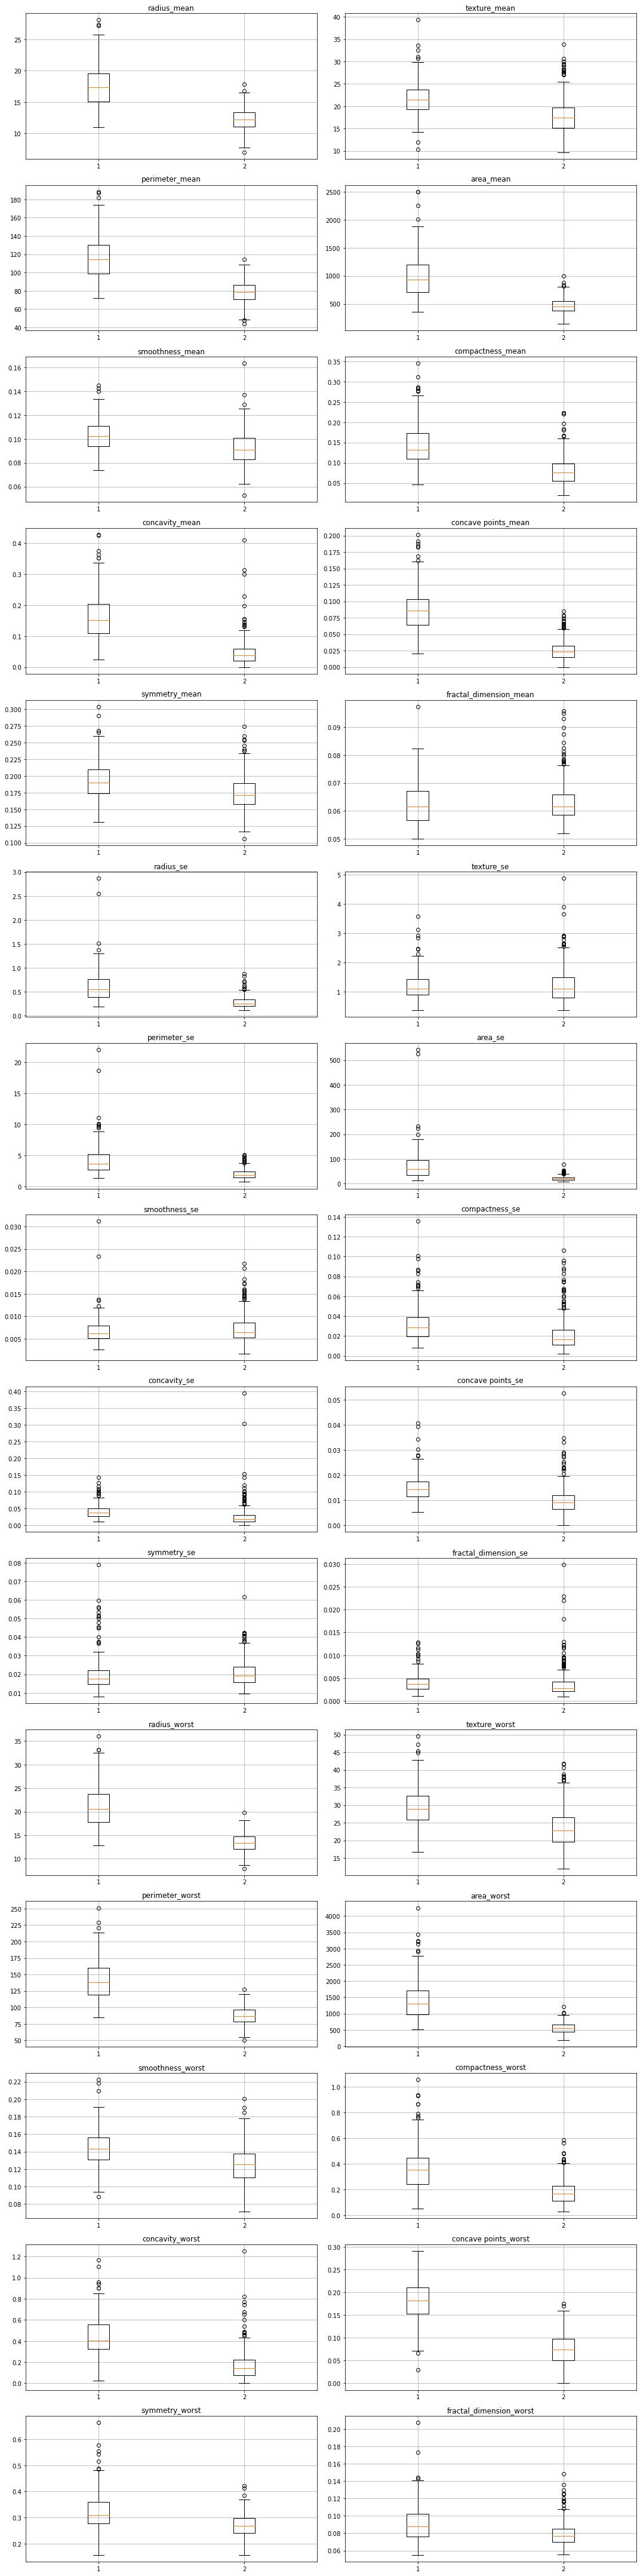

In [11]:
fig, axes = plt.subplots(15, 2, figsize=(15, 60)) 
ax = axes.ravel() 
for i in range(30):
    ax[i].grid()
    ax[i].boxplot([(malignant.drop(['diagnosis'], axis='columns').iloc[:, i]),
                   (benign.drop(['diagnosis'], axis='columns').iloc[:, i])])
#     ax[i].set_xlabel("Значение признака") 
    ax[i].set_title(data.columns[i])
 
fig.tight_layout()

Довольно таки неплохо разделимы perimeter_wrost и radius_wrost. 

Посмотрим на корреляцию

In [12]:
Corr = data_all.drop(['diagnosis'], axis='columns').corr()

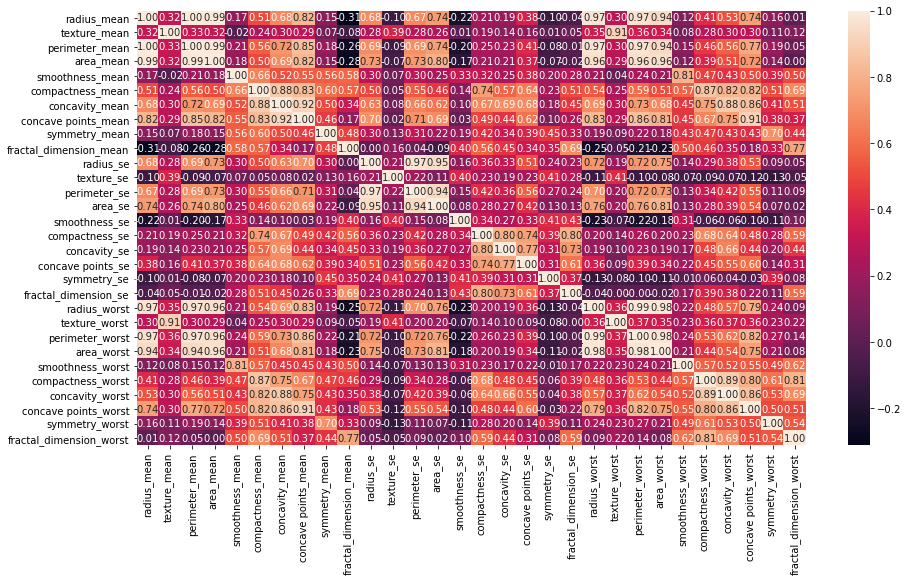

In [13]:
plt.figure(figsize=(15,8));
sns.heatmap(Corr, annot=True, fmt='.2f');

In [14]:
# fig, axes = plt.subplots(15, 2, figsize=(15, 60)) 
# ax = axes.ravel() 
CorField = []
CorFields=[]
for i in Corr:
    for j in Corr.index[Corr[i] > 0.8]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            CorFields.append([i,j])
            print (i, j, Corr[i][Corr.index == j].values[0])
#             sns.regplot(x=i, y=j, data=data)
#             plt.ylim(0,);

radius_mean perimeter_mean 0.9978552814938113
radius_mean area_mean 0.9873571700566119
radius_mean concave points_mean 0.8225285223871791
radius_mean radius_worst 0.9695389726112053
radius_mean perimeter_worst 0.9651365139559878
radius_mean area_worst 0.9410824595860459
texture_mean texture_worst 0.9120445888404215
smoothness_mean smoothness_worst 0.8053241954943631
compactness_mean concavity_mean 0.8831206701772499
compactness_mean compactness_worst 0.8658090398022638
compactness_mean concavity_worst 0.8162752498000281
compactness_mean concave points_worst 0.8155732235690654
radius_se perimeter_se 0.9727936770160752
radius_se area_se 0.95183011211099
compactness_se concavity_se 0.8012683427383301
compactness_se fractal_dimension_se 0.8032688176617685


In [15]:
corr_cols=['radius_mean','texture_mean','smoothness_mean','compactness_mean','radius_se','compactness_se']

Довольно таки предсказуемо что большая корреляция между такими параметрами как радиус и периметр/площадь

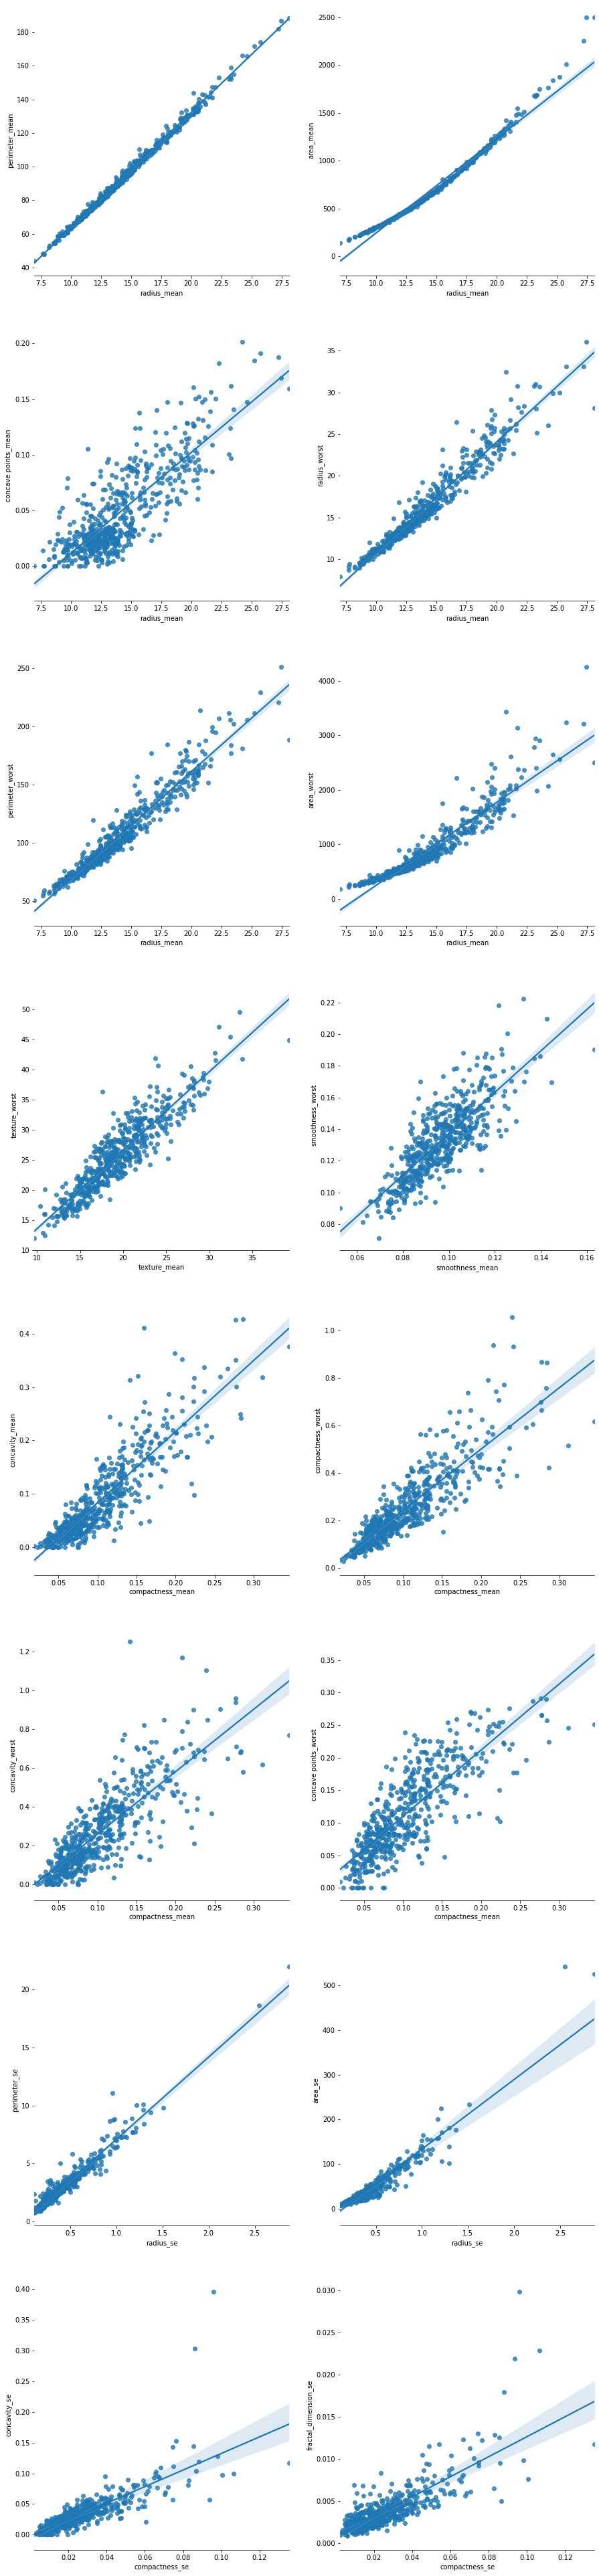

In [16]:
import math
f, axes = plt.subplots(math.ceil(len(CorFields)/2), 2, figsize=(15, 70))
sns.despine(left=True)
sns.set(color_codes=True)
i=0
for x,y in CorFields:
    sns.regplot(x=x, y=y, data=data_all, ax=axes[i // 2, i%2])

    i+=1
    

### KNN

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler




In [18]:
def add_to_result(name,y_true,y_pred,result=pd.DataFrame()):
    result_columns=['name','Accuracy','Precision','Recall','F1-score','ROC']
    resultTMP = pd.DataFrame([[name,
                               accuracy_score(y_true, y_pred),
                               precision_score(y_true, y_pred),
                               recall_score(y_true, y_pred),
                               f1_score(y_true, y_pred),
                               roc_auc_score(y_true, y_pred)
                              ]], columns=result_columns)
    if(not result.empty):
        return pd.concat([result, resultTMP])
    return resultTMP


Подготовим данные

Данные без преобразований

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_all.drop(['diagnosis'], axis='columns'), data_all['diagnosis'], random_state=0)
y_true=y_test

Стандатизация

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Удаляем коррелируемые данные

In [21]:
X_train_scaled_corr = scaler.fit_transform(X_train.drop(corr_cols, axis='columns'))
X_test_scaled_corr = scaler.transform(X_test.drop(corr_cols, axis='columns'))

### Обучаем KNN
1. KNN без параметров
2. КNN GridSearchCV


In [22]:

result=pd.DataFrame([]);

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
result=add_to_result('KNN Без параметров Стандарные данные',y_true, y_pred,result)

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred=knn.predict(X_test_scaled)
result=add_to_result('KNN Без параметров Scaled',y_true, y_pred,result)

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_corr, y_train)
y_pred=knn.predict(X_test_scaled_corr)
result=add_to_result('KNN Без параметров Scaled',y_true, y_pred,result)

In [26]:


param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')


grid_search.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
result=add_to_result('KNN - GridSearchCV - Стандартные данные ',y_true, y_pred,result)


grid_search.fit(X_train_scaled, y_train)
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
result=add_to_result('KNN - GridSearchCV - Scaled ',y_true, y_pred,result)

grid_search.fit(X_train_scaled_corr, y_train)
y_pred = grid_search.best_estimator_.predict(X_test_scaled_corr)
result=add_to_result('KNN - GridSearchCV - Scaled+Corr ',y_true, y_pred,result)

## Логистическая регрессия

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
y_predict=log_reg.predict(X_test_scaled)
result=add_to_result('LogisticRegression - Без параметров - Scaled',y_true, y_predict,result)

log_reg.fit(X_train_scaled_corr, y_train)
y_predict=log_reg.predict(X_test_scaled_corr)
result=add_to_result('LogisticRegression - Без параметров - Scaled+Corr',y_true, y_predict,result)

In [28]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
y_pred = grid.best_estimator_.predict(X_test_scaled)
result=add_to_result('LogisticRegression - GridSearchCV - Scaled ',y_true, y_pred,result)

grid.fit(X_train_scaled_corr, y_train)
y_pred = grid.best_estimator_.predict(X_test_scaled_corr)
result=add_to_result('LogisticRegression - GridSearchCV - Scaled+Corr ',y_true, y_pred,result)

In [29]:
result

,name,Accuracy,Precision,Recall,F1-score,ROC
0,KNN Без параметров Стандарные данные,0.937063,0.955056,0.944444,0.949721,0.934486
0,KNN Без параметров Scaled,0.951049,0.936842,0.988889,0.962162,0.937841
0,KNN Без параметров Scaled,0.958042,0.946809,0.988889,0.967391,0.947275
0,KNN - GridSearchCV - Стандартные данные,0.958042,0.956522,0.977778,0.967033,0.951153
0,KNN - GridSearchCV - Scaled,0.965035,0.977528,0.966667,0.972067,0.964465
0,KNN - GridSearchCV - Scaled+Corr,0.958042,0.956522,0.977778,0.967033,0.951153
0,LogisticRegression - Без параметров - Scaled,0.958042,0.966667,0.966667,0.966667,0.955031
0,LogisticRegression - Без параметров - Scaled+Corr,0.972028,0.977778,0.977778,0.977778,0.970021
0,LogisticRegression - GridSearchCV - Scaled,0.958042,0.966667,0.966667,0.966667,0.955031
0,LogisticRegression - GridSearchCV - Scaled+Corr,0.930070,0.965116,0.922222,0.943182,0.932809


Неожиданный момент, что логистическая регрессия лучше без параметров 

Плюс логистическая регрессия gridsearch с удаленными коррелируешими отработала еще хуже